In [6]:
import yfinance as yf
from statsmodels.tsa.stattools import coint
import itertools
import warnings
warnings.filterwarnings("ignore")

semi_tickers = [
    'NVDA', 'AMD', 'TSM', 'INTC', 'ASML', 'AVGO', 'QCOM', 'TXN',
    'MU', 'LRCX', 'MRVL', 'ON', 'MPWR', 'KLAC', 'SWKS'
]

prices = yf.download(semi_tickers, start='2024-01-01', end='2024-12-31', auto_adjust=False)['Adj Close'].dropna()

results = []
for a, b in itertools.combinations(semi_tickers, 2):
    pa, pb = prices[a], prices[b]
    min_len = min(len(pa), len(pb))
    if min_len == 0:
        continue
    score, pvalue, _ = coint(pa, pb)
    results.append((a, b, pvalue))

results.sort(key=lambda x: x[2])
print("Top 10 cointegrated pairs (lowest p-value):")
for a, b, pval in results[:10]:
    print(f"{a} vs {b}: p-value={pval:.4f}")


[*********************100%***********************]  15 of 15 completed


Top 10 cointegrated pairs (lowest p-value):
AMD vs ON: p-value=0.0268
NVDA vs TSM: p-value=0.0354
ON vs MPWR: p-value=0.0414
ON vs KLAC: p-value=0.0439
ON vs SWKS: p-value=0.0449
AMD vs INTC: p-value=0.0494
ASML vs LRCX: p-value=0.0652
QCOM vs MU: p-value=0.0679
AMD vs AVGO: p-value=0.0699
ASML vs MRVL: p-value=0.0851


Use NVDA and TSM

In [3]:
stock_y = 'TSM'
stock_x = 'NVDA'
tickers = [stock_x, stock_y]
prices = yf.download(tickers, start='2024-01-01', end='2024-12-31', auto_adjust=False)['Adj Close'].dropna()

[*********************100%***********************]  2 of 2 completed


In [7]:
import statsmodels.api as sm

Y = prices[stock_y]
X = prices[stock_x]
X_const = sm.add_constant(Y)
model = sm.OLS(X, X_const)
result = model.fit()
beta = result.params[1]
print(f"Hedge ratio (beta): {beta:.4f}")

Hedge ratio (beta): 0.9345


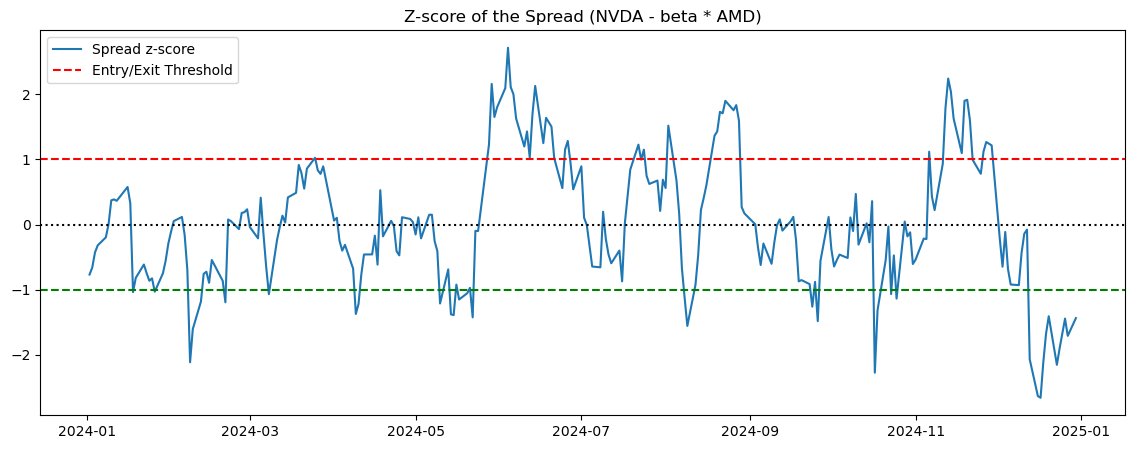

In [9]:
import matplotlib.pyplot as plt

spread = X - beta * Y
spread_mean = spread.mean()
spread_std = spread.std()
zscore = (spread - spread_mean) / spread_std

plt.figure(figsize=(14,5))
plt.plot(zscore, label='Spread z-score')
plt.axhline(1, color='red', linestyle='--', label='Entry/Exit Threshold')
plt.axhline(-1, color='green', linestyle='--')
plt.axhline(0, color='black', linestyle=':')
plt.title('Z-score of the Spread (NVDA - beta * AMD)')
plt.legend()
plt.show()